In [1]:
# Imports

import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn as sk

In [2]:
# Load data set
data_wrangled = pd.read_csv('marital_satisfaction_data_wrangled.csv')
dw_num = pd.read_csv('marital_satisfaction_data_wrangled_num.csv')
data_unedited = pd.read_excel('marital_satisfaction_data.xlsx')
data_wrangled.describe()

,Unnamed: 0,age,marriage_duration_years,num_children_total,num_children_inhome
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,3588.500000,40.665018,14.760102,1.766648,1.466982
std,2072.254449,11.446824,11.587541,1.307748,1.383066
min,0.000000,17.000000,0.080000,0.000000,0.000000
25%,1794.250000,32.000000,5.000000,1.000000,0.000000
50%,3588.500000,39.000000,12.000000,2.000000,1.000000
75%,5382.750000,49.000000,23.000000,2.000000,2.000000
max,7177.000000,88.000000,70.000000,12.000000,13.000000


In [3]:
data_wrangled.head()

,Unnamed: 0,country,sex,age,marriage_duration_years,num_children_total,num_children_inhome,edu_level,material_situation,religion,...,spouse_satisfaction,relationship_satisfaction,natl_pride_in_parents,natl_pride_in_children,natl_aging_parents_live_with_children,natl_children_live_at_home_marraige,indv_pride_in_parents,indv_pride_in_children,indv_aging_parents_live_with_children,indv_children_live_at_home_marraige
0,0,Brazil,Male,21.0,2.0,0.0,0.0,Bachelors or Masters degree,Average,Protestant,...,Very Satisfied,Very Satisfied,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1,1,Brazil,Male,29.0,3.0,1.0,0.0,Bachelors or Masters degree,Average,Protestant,...,Somewhat Satisfied,Somewhat Satisfied,Agree somewhat,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
2,2,Brazil,Male,30.0,7.0,0.0,0.0,Bachelors or Masters degree,Average,Protestant,...,Very Satisfied,Very Satisfied,Agree somewhat,Strongly agree,Agree somewhat,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,3,Brazil,Male,30.0,7.0,1.0,1.0,Bachelors or Masters degree,Average,Protestant,...,Somewhat Satisfied,Somewhat Satisfied,Agree slightly,Strongly agree,Strongly agree,Agree somewhat,Strongly agree,Strongly agree,Strongly agree,Strongly agree
4,4,Brazil,Male,28.0,9.0,0.0,0.0,High school or technical school,Better than average,Protestant,...,Somewhat Satisfied,Very Satisfied,Agree slightly,Agree somewhat,Agree slightly,Agree somewhat,Strongly agree,Strongly agree,Strongly agree,Strongly agree


In [4]:
col_names = pd.read_csv('col_names.csv')

In [5]:
col_names = list(col_names)

In [6]:
data_unedited.columns = col_names

In [7]:
data_unedited = data_unedited.drop(index=[1])

In [8]:
data_unedited = data_unedited.drop(index=[0])

In [9]:
data_unedited = data_unedited.drop('country', axis='columns')

In [10]:
data_unedited['natl_pride_in_parents'] = np.array(data_unedited['natl_pride_in_parents'], dtype=float)

In [11]:
data_unedited['indv_pride_in_parents'] = np.array(data_unedited['indv_pride_in_parents'], dtype=float)

In [12]:
data_unedited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7178 entries, 2 to 7179
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sex                                    7178 non-null   float64
 1   age                                    7178 non-null   float64
 2   marriage_duration_years                7178 non-null   float64
 3   num_children_total                     7178 non-null   float64
 4   num_children_inhome                    7178 non-null   float64
 5   edu_level                              7178 non-null   float64
 6   material_situation                     7178 non-null   float64
 7   religion                               7092 non-null   float64
 8   religiosity                            7178 non-null   float64
 9   pension                                7178 non-null   float64
 10  enjoy_spouse_company                   7178 non-null   float64
 11  happ

In [13]:
data_unedited.corr()

,sex,age,marriage_duration_years,num_children_total,num_children_inhome,edu_level,material_situation,religion,religiosity,pension,...,spouse_satisfaction,relationship_satisfaction,natl_pride_in_parents,natl_pride_in_children,natl_aging_parents_live_with_children,natl_children_live_at_home_marraige,indv_pride_in_parents,indv_pride_in_children,indv_aging_parents_live_with_children,indv_children_live_at_home_marraige
sex,1.000000,-0.004270,0.041750,0.011967,0.000981,0.000345,0.060717,-0.023049,0.046603,0.023138,...,-0.082572,-0.076877,0.022531,0.031762,0.021229,0.015400,0.017940,0.028914,0.015418,0.015768
age,-0.004270,1.000000,0.879498,0.411530,0.093570,-0.166995,0.026743,-0.124049,-0.083105,-0.061378,...,-0.082072,-0.075607,-0.000931,-0.044579,0.108259,-0.021208,-0.028728,-0.065006,0.095262,0.003350
marriage_duration_years,0.041750,0.879498,1.000000,0.445837,0.102413,-0.240605,0.063214,-0.138510,-0.049877,-0.069038,...,-0.085854,-0.078240,0.000673,-0.040446,0.103101,-0.048931,-0.048901,-0.069453,0.086469,-0.045138
num_children_total,0.011967,0.411530,0.445837,1.000000,0.628624,-0.199600,-0.028495,-0.187548,0.145185,-0.118192,...,-0.029315,-0.032228,-0.083926,-0.048231,-0.032717,-0.031951,-0.037481,-0.047154,-0.074260,-0.090065
num_children_inhome,0.000981,0.093570,0.102413,0.628624,1.000000,-0.107827,-0.082189,-0.149858,0.163802,-0.109504,...,-0.010971,-0.015456,-0.090944,-0.044483,-0.075359,-0.041131,-0.020780,-0.028372,-0.077926,-0.074194
edu_level,0.000345,-0.166995,-0.240605,-0.199600,-0.107827,1.000000,-0.209583,0.134154,-0.027722,-0.013107,...,0.058127,0.069459,-0.013326,-0.028042,-0.009607,0.037674,0.001411,-0.009906,0.018730,0.074007
material_situation,0.060717,0.026743,0.063214,-0.028495,-0.082189,-0.209583,1.000000,-0.027441,-0.083562,0.139367,...,-0.148010,-0.145654,0.076479,0.069225,0.087129,0.014132,0.017074,0.035815,0.071560,0.009761
religion,-0.023049,-0.124049,-0.138510,-0.187548,-0.149858,0.134154,-0.027441,1.000000,-0.184971,0.078531,...,0.017020,0.013966,-0.017958,-0.038520,-0.049047,-0.020449,-0.024949,-0.026495,-0.017500,0.041950
religiosity,0.046603,-0.083105,-0.049877,0.145185,0.163802,-0.027722,-0.083562,-0.184971,1.000000,-0.145442,...,0.076859,0.083821,-0.154763,-0.087407,-0.148174,-0.132758,-0.120977,-0.087065,-0.193796,-0.199099
pension,0.023138,-0.061378,-0.069038,-0.118192,-0.109504,-0.013107,0.139367,0.078531,-0.145442,1.000000,...,-0.050681,-0.048842,0.173753,0.108324,0.130645,0.087491,0.082899,0.089955,0.142900,0.120124


In [14]:
#sns.pairplot(data_unedited, kind='reg')

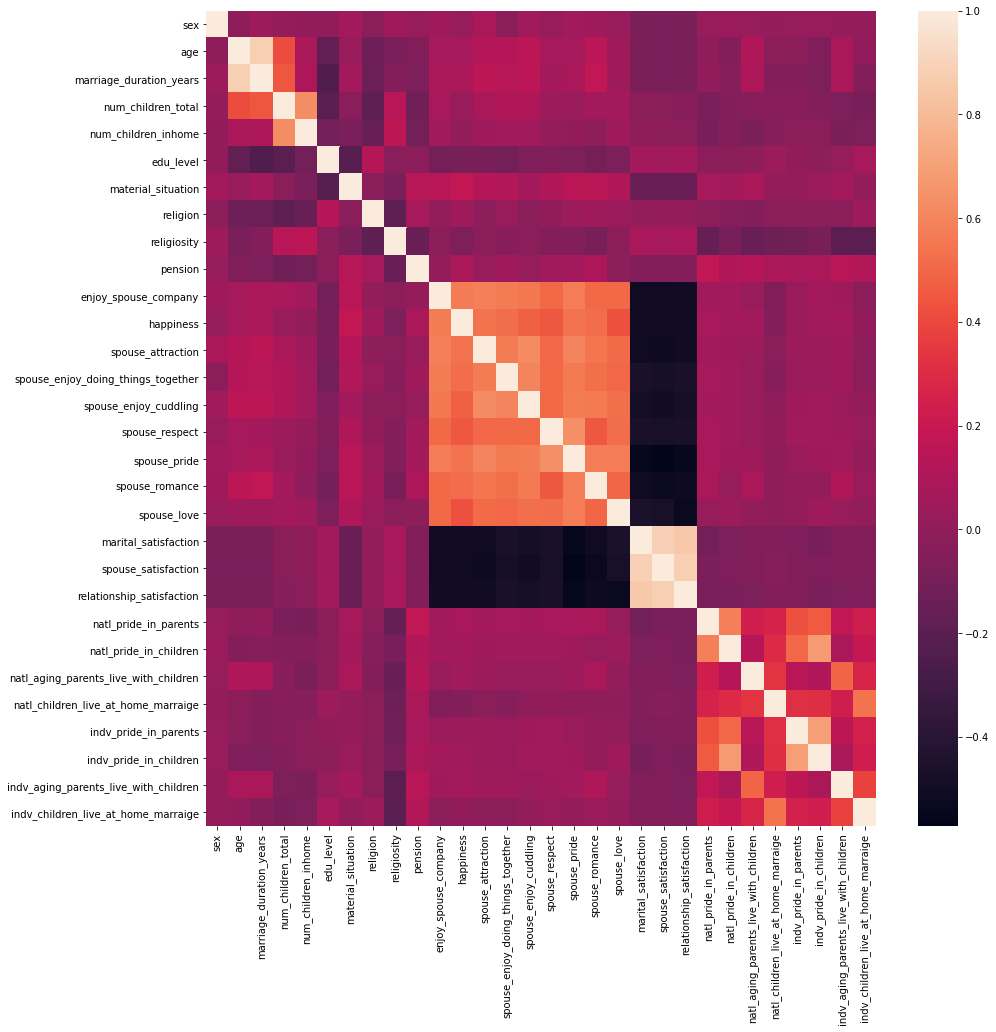

In [15]:
# Correlation Heatmap of all features. Appears target is only highly correlated with two other vars
# Questions: How can I focus on one target variable? This heatmap doesn't seem super useful.
# Also, can/should I have normalilzed? Doesn't make sense since mean/std aren't meaningful with categorical data.

fig, heat = plt.subplots(figsize = (15,15))
sns.heatmap(data_unedited.corr())

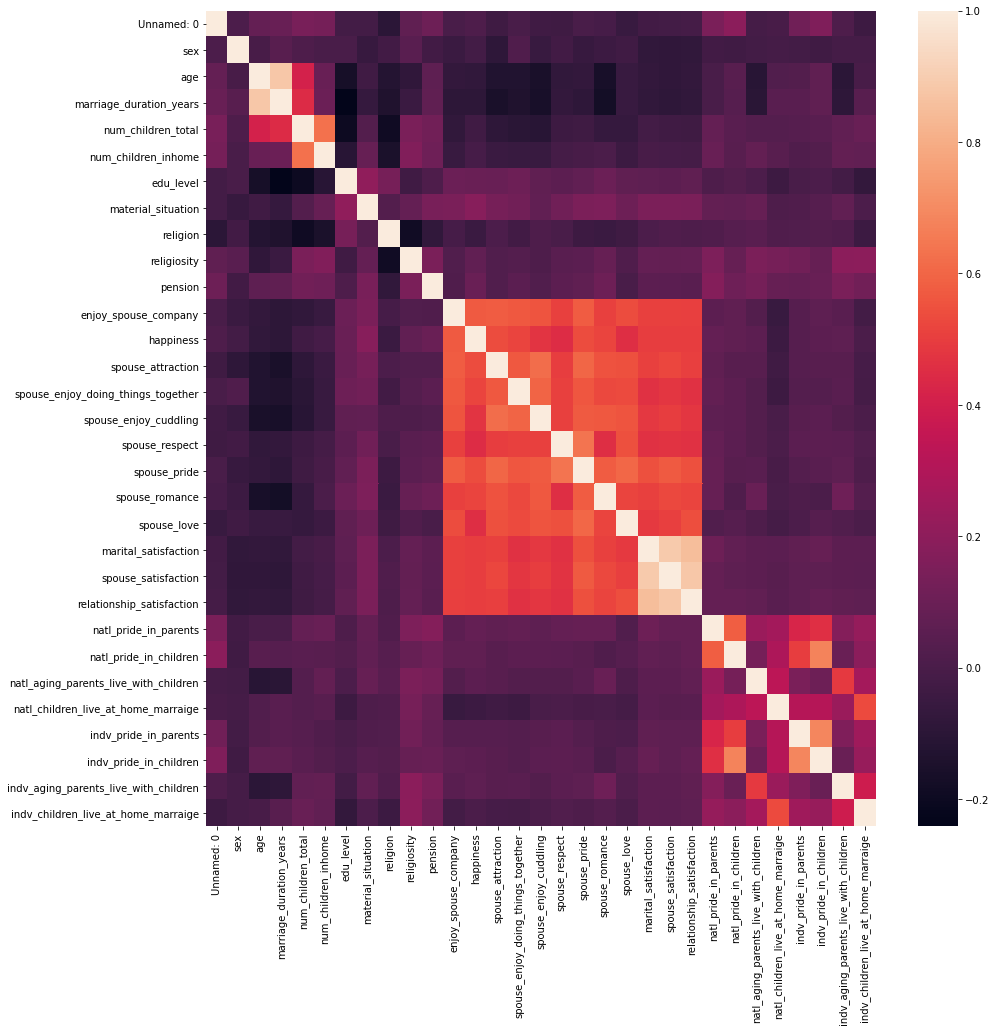

In [16]:
# Correlation Heatmap of all features. Appears target is only highly correlated with two other vars
# Questions: How can I focus on one target variable? This heatmap doesn't seem super useful.
# Also, can/should I have normalilzed? Doesn't make sense since mean/std aren't meaningful with categorical data.

fig, heat = plt.subplots(figsize = (15,15))
sns.heatmap(dw_num.corr())
plt.savefig('heatmap.png')

In [17]:
marsat_order = pd.CategoricalDtype(['Very Satisfied', "Somewhat Satisfied", "Slightly Satisfied", "Neutral", "Slightly Dissatisfied", "Somewhat Dissatisfied", "Very Dissatisfied"], ordered=True)
marsat_responses = ['Very Satisfied', "Somewhat Satisfied", "Slightly Satisfied", "Neutral", "Slightly Dissatisfied", "Somewhat Dissatisfied", "Very Dissatisfied"]
mrq_order = pd.CategoricalDtype(["Yes","Rather yes","Neither yes or no","Rather no","No"], ordered=True)
mrq_responses = ["Yes","Rather yes","Neither yes or no","Rather no","No"]
gs_order = pd.CategoricalDtype(['Strongly agree', 'Agree somewhat', 'Agree slightly', 'Neither agree nor disagree', 'Disagree slightly', 'Disagree somewhat', 'Disagree strongly'], ordered=True)
gs_responses = ['Strongly agree', 'Agree somewhat', 'Agree slightly', 'Neither agree nor disagree', 'Disagree slightly', 'Disagree somewhat', 'Disagree strongly']

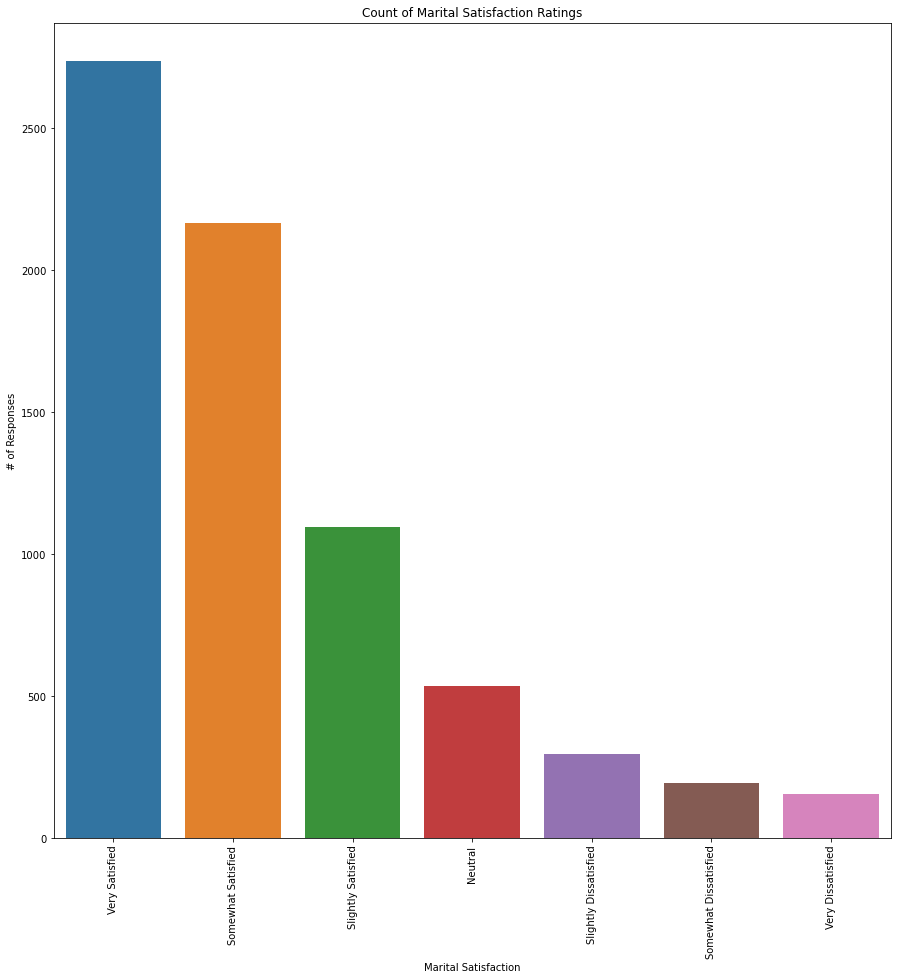

In [18]:
# Univariate chart of target
fig, hist = plt.subplots(figsize = (15,15))
sns.countplot(data_wrangled['marital_satisfaction'], order=marsat_responses)
plt.xlabel('Marital Satisfaction')
plt.ylabel('# of Responses')
plt.title('Count of Marital Satisfaction Ratings')
plt.xticks(rotation=90)
plt.savefig('dv_marsat.png')

sex                    Female  Male
marital_satisfaction               
Neutral                   314   222
Slightly Dissatisfied     175   121
Slightly Satisfied        600   496
Somewhat Dissatisfied     112    81
Somewhat Satisfied       1162  1003
Very Dissatisfied         110    46
Very Satisfied           1354  1382

Chi-square:
p: 1.590819615057286e-08
chi2: 47.35327815759295
DoF: 6


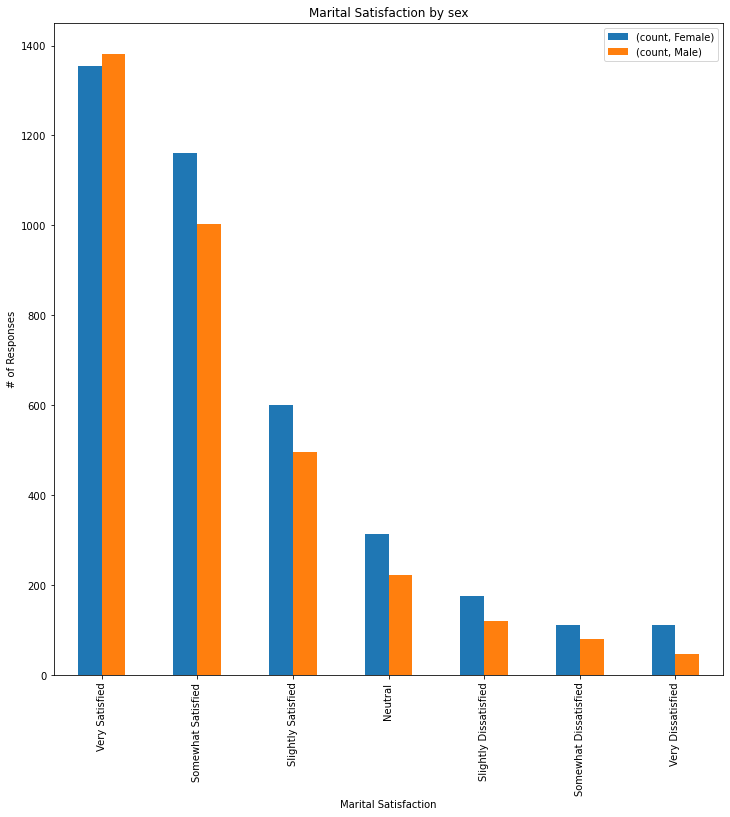

(47.35327815759295, 1.590819615057286e-08, 6, array([[ 285.77208136,  250.22791864],
       [ 157.81443299,  138.18556701],
       [ 584.33992756,  511.66007244],
       [ 102.89927556,   90.10072444],
       [1154.28461967, 1010.71538033],
       [  83.17247144,   72.82752856],
       [1458.71719142, 1277.28280858]]))


In [19]:
# Interesting observation that men only outnumber women in one category. Women outnuber men as respondents here.

df = data_wrangled[['marital_satisfaction','sex']]
ct = pd.crosstab(index=df['marital_satisfaction'], columns=df['sex'])
print(ct)
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
print("")
print("Chi-square:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
df = pd.DataFrame(df.groupby(['marital_satisfaction', 'sex']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = df.pivot_table(df, index='marital_satisfaction', columns='sex')
df.loc[marsat_responses].plot(kind='bar', stacked=False, figsize=(12,12))
plt.xlabel('Marital Satisfaction')
plt.ylabel('# of Responses')
plt.title('Marital Satisfaction by sex')
plt.legend()
plt.show()
print(scipy.stats.chi2_contingency(df))

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

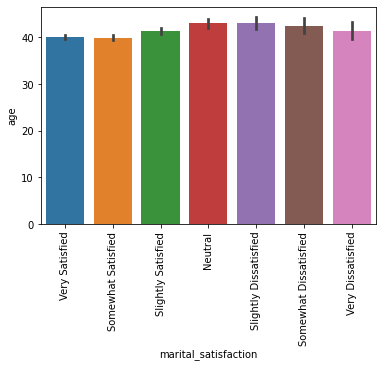

In [20]:
sns.barplot(y=data_wrangled['age'], x=data_wrangled['marital_satisfaction'], data=data_wrangled, order=marsat_responses)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

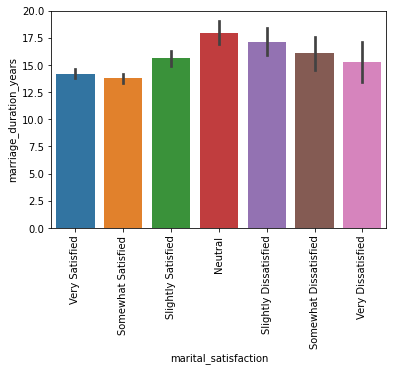

In [21]:
#Once again, hard to see if there is any effect! Pearson R is very weak

sns.barplot(y=data_wrangled['marriage_duration_years'], x=data_wrangled['marital_satisfaction'], data=data_wrangled, order=marsat_responses)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

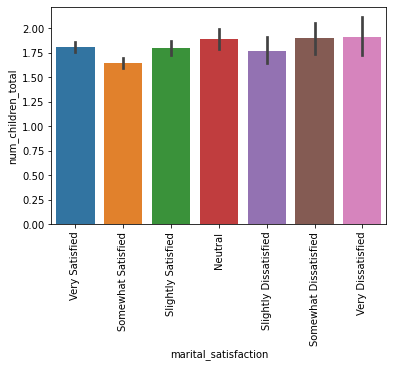

In [22]:
sns.barplot(y=data_wrangled['num_children_total'], x=data_wrangled['marital_satisfaction'], data=data_wrangled, order=marsat_responses)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

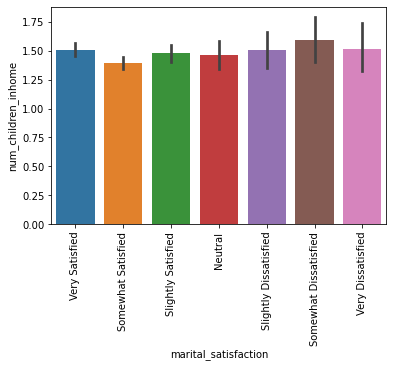

In [23]:
#barchart of avg w/ error bar for conf interval

sns.barplot(y=data_wrangled['num_children_inhome'], x=data_wrangled['marital_satisfaction'], data=data_wrangled, order=marsat_responses)
plt.xticks(rotation=90)

edu_level              Bachelors or Masters degree  \
marital_satisfaction                                 
Neutral                                        231   
Slightly Dissatisfied                          127   
Slightly Satisfied                             533   
Somewhat Dissatisfied                           82   
Somewhat Satisfied                            1268   
Very Dissatisfied                               73   
Very Satisfied                                1459   

edu_level              High school or technical school  No formal education  \
marital_satisfaction                                                          
Neutral                                            165                    6   
Slightly Dissatisfied                               98                    1   
Slightly Satisfied                                 307                   18   
Somewhat Dissatisfied                               60                    2   
Somewhat Satisfied                     

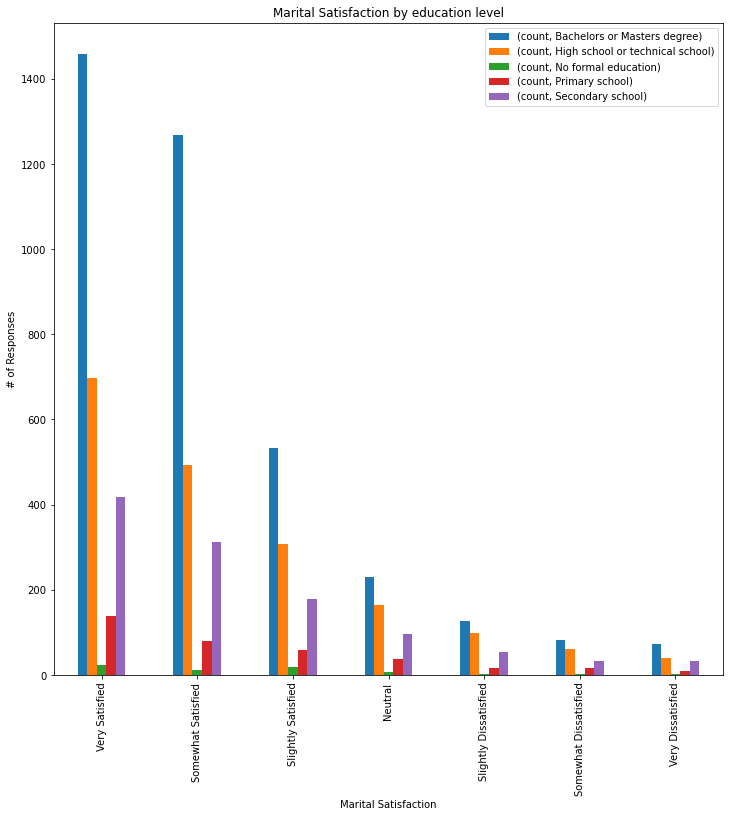

In [24]:
# Lots of college education in this popualtion. Potential limitation of this study. 

df = data_wrangled[['marital_satisfaction','edu_level']]
ct = pd.crosstab(index=df['marital_satisfaction'], columns=df['edu_level'])
print(ct)
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
print("")
print("Chi-square:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
df = pd.DataFrame(df.groupby(['marital_satisfaction', 'edu_level']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = df.pivot_table(df, index='marital_satisfaction', columns='edu_level')
df.loc[marsat_responses].plot(kind='bar', stacked=False, figsize=(12,12))
plt.xlabel('Marital Satisfaction')
plt.ylabel('# of Responses')
plt.title('Marital Satisfaction by education level')
plt.legend()
plt.show()

material_situation     Average  Better than average  Much better than average  \
marital_satisfaction                                                            
Neutral                    304                  133                        25   
Slightly Dissatisfied      155                   58                        23   
Slightly Satisfied         624                  287                        68   
Somewhat Dissatisfied       97                   45                        11   
Somewhat Satisfied        1117                  701                       189   
Very Dissatisfied           62                   39                        17   
Very Satisfied            1333                  781                       420   

material_situation     Much worse than average  Worse than average  
marital_satisfaction                                                
Neutral                                     10                  64  
Slightly Dissatisfied                        7                 

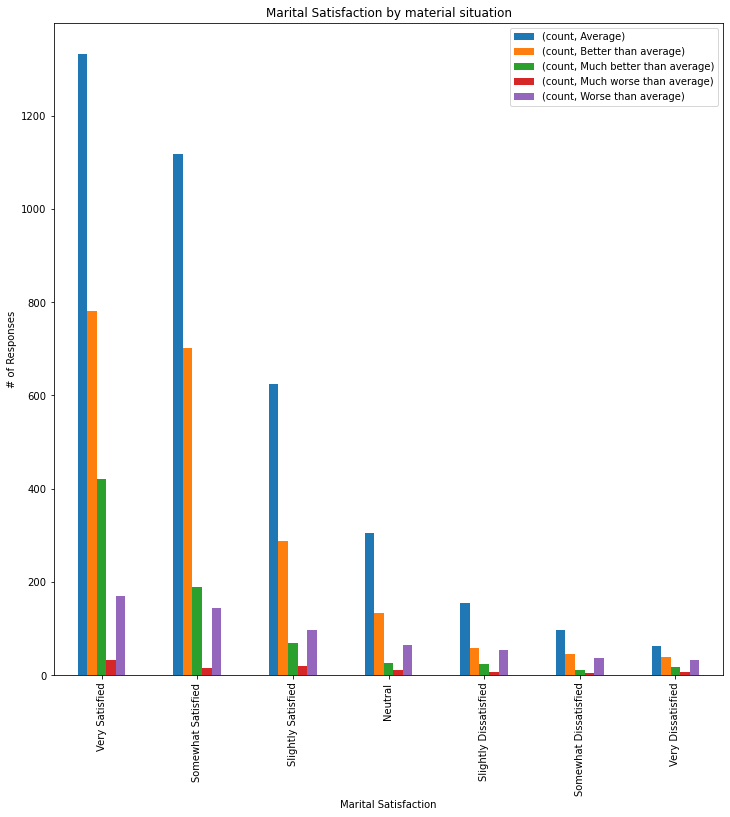

In [25]:
# Similar to above visualization, lots of average to better-than-average population. Either many optimistic participants or a homogenous study 

df = data_wrangled[['marital_satisfaction','material_situation']]
ct = pd.crosstab(index=df['marital_satisfaction'], columns=df['material_situation'])
print(ct)
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
print("")
print("Chi-square:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
df = pd.DataFrame(df.groupby(['marital_satisfaction', 'material_situation']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df = df.pivot_table(df, index='marital_satisfaction', columns='material_situation')
df.loc[marsat_responses].plot(kind='bar', stacked=False, figsize=(12,12))
plt.xlabel('Marital Satisfaction')
plt.ylabel('# of Responses')
plt.title('Marital Satisfaction by material situation')
plt.legend()
plt.show()

religion               Buddhist  Catholic  Declined to answer  Evangelic  \
marital_satisfaction                                                       
Neutral                       7       204                   7          0   
Slightly Dissatisfied         3       120                   3          0   
Slightly Satisfied           15       399                  16          0   
Somewhat Dissatisfied         3        76                   3          0   
Somewhat Satisfied           24       815                  18          0   
Very Dissatisfied             1        55                   2          0   
Very Satisfied               23       913                  37          2   

religion               Hindu  Jehovah  Jewish  Muslim  None  Orthodox  Other  \
marital_satisfaction                                                           
Neutral                   12        2       2     132    82        27      4   
Slightly Dissatisfied      7        0       1      61    44        19      

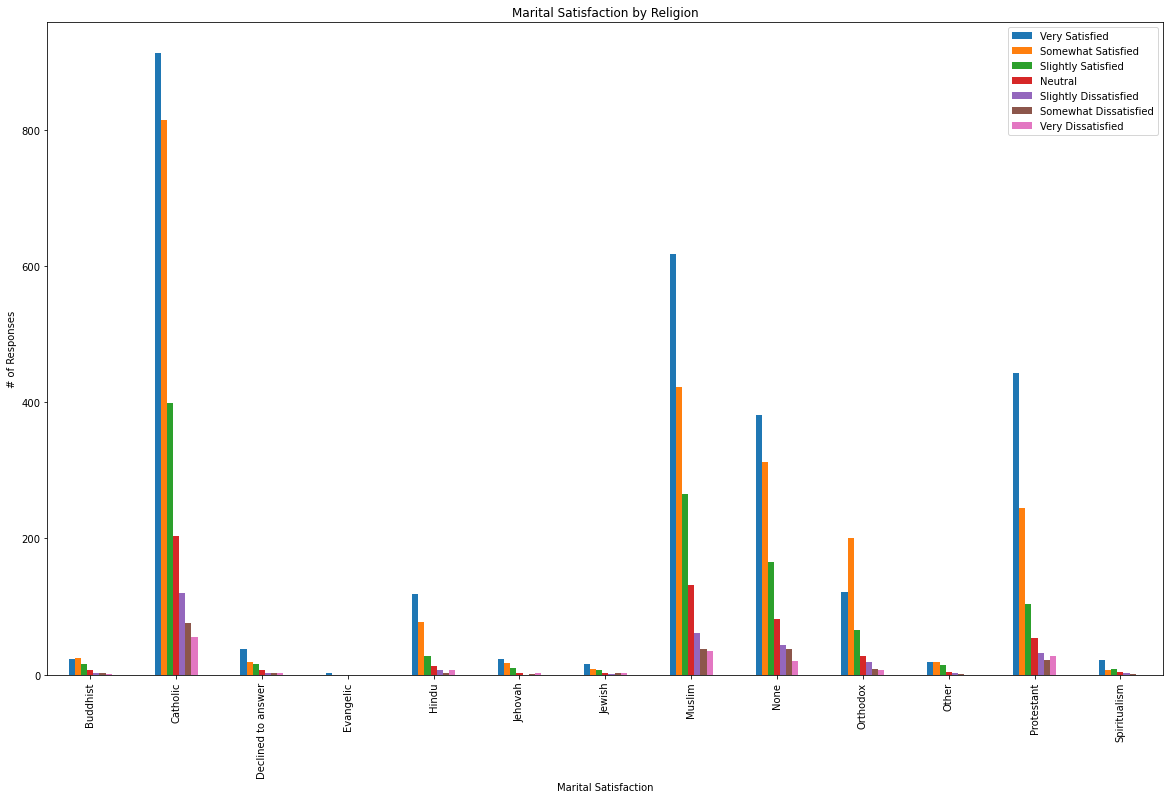

In [26]:
df = data_wrangled[['religion','marital_satisfaction']]
ct = pd.crosstab(index=df['marital_satisfaction'], columns=df['religion'])
print(ct)
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
print("")
print("Chi-square:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
df = pd.DataFrame(df.groupby(['religion', 'marital_satisfaction']).size()).reset_index()
df['marital_satisfaction'] = df['marital_satisfaction'].astype(marsat_order)
df.rename(columns = {0:'count'}, inplace=True)
df = df.pivot_table(df, index='religion', columns='marital_satisfaction')
df.plot(kind='bar', stacked=False, figsize=(20,12))
plt.xlabel('Marital Satisfaction')
plt.ylabel('# of Responses')
plt.title('Marital Satisfaction by Religion')
plt.legend(marsat_responses)
plt.show()

religiosity            Extremely  Moderately  Not at all  \
marital_satisfaction                                       
Neutral                       39         176          71   
Slightly Dissatisfied         19          88          59   
Slightly Satisfied            85         359         140   
Somewhat Dissatisfied         12          55          37   
Somewhat Satisfied           166         644         278   
Very Dissatisfied             22          60          24   
Very Satisfied               395         901         389   

religiosity            Slightly irreligious  Slightly religious  \
marital_satisfaction                                              
Neutral                                  61                  87   
Slightly Dissatisfied                    36                  44   
Slightly Satisfied                      126                 206   
Somewhat Dissatisfied                    33                  19   
Somewhat Satisfied                      256              

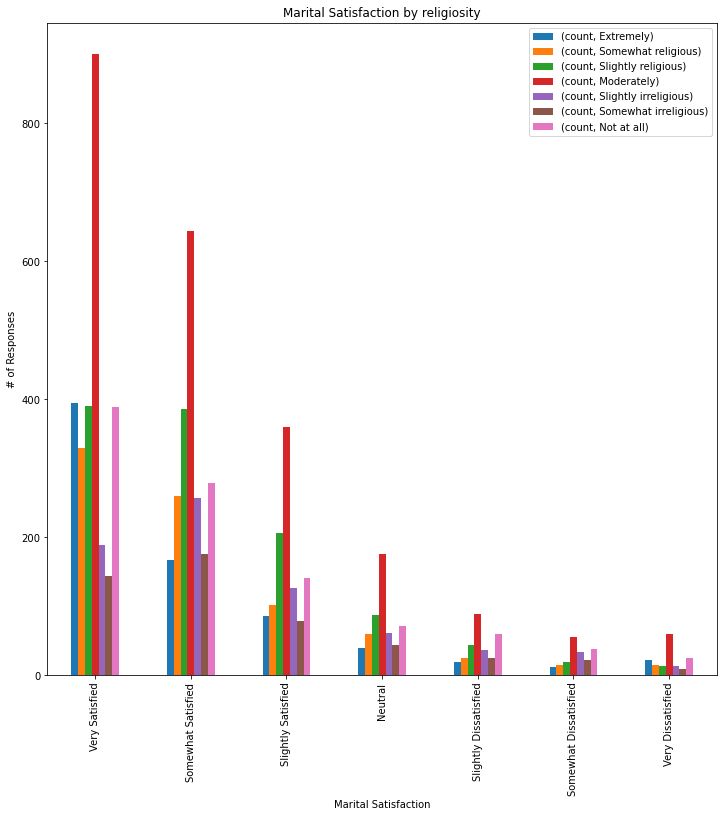

In [27]:
rel_order = pd.CategoricalDtype(["Extremely","Somewhat religious","Slightly religious","Moderately","Slightly irreligious","Somewhat irreligious","Not at all"], ordered=True)

df = data_wrangled[['marital_satisfaction','religiosity']]
ct = pd.crosstab(index=df['marital_satisfaction'], columns=df['religiosity'])
print(ct)
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
print("")
print("Chi-square:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
df = pd.DataFrame(df.groupby(['marital_satisfaction', 'religiosity']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df['religiosity'] = df['religiosity'].astype(rel_order)
df = df.pivot_table(df, index='marital_satisfaction', columns='religiosity')
df.loc[marsat_responses].plot(kind='bar', stacked=False, figsize=(12,12))
plt.xlabel('Marital Satisfaction')
plt.ylabel('# of Responses')
plt.title('Marital Satisfaction by religiosity')
plt.legend()
plt.show()

pension                Agree slightly  Agree somewhat  Disagree slightly  \
marital_satisfaction                                                       
Neutral                           101             100                 54   
Slightly Dissatisfied              62              43                 25   
Slightly Satisfied                226             183                 92   
Somewhat Dissatisfied              36              31                 19   
Somewhat Satisfied                431             421                218   
Very Dissatisfied                  33              21                 17   
Very Satisfied                    435             537                187   

pension                Disagree somewhat  Disagree strongly  \
marital_satisfaction                                          
Neutral                               63                 77   
Slightly Dissatisfied                 42                 48   
Slightly Satisfied                   129                122   


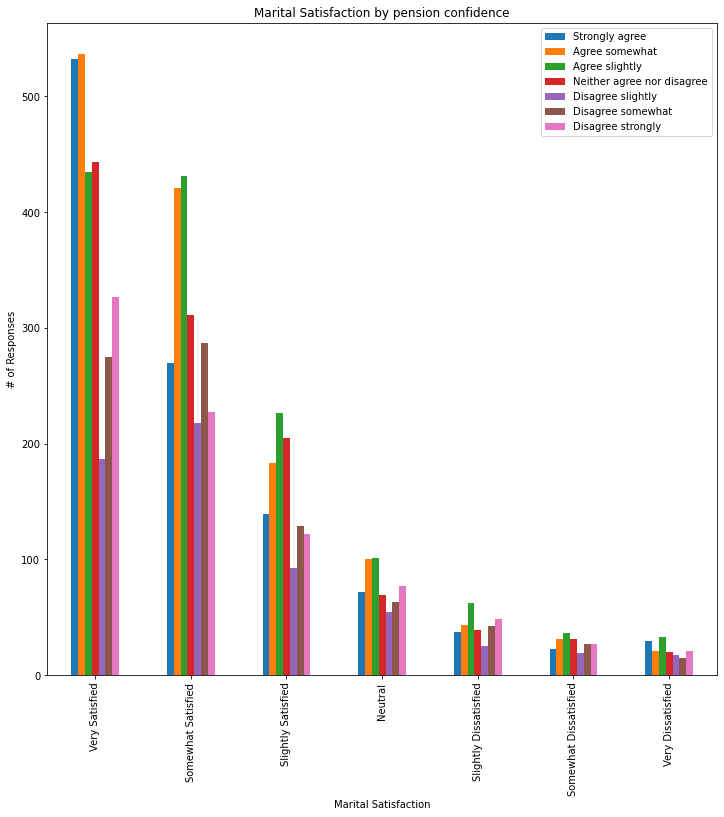

In [28]:
df = data_wrangled[['marital_satisfaction','pension']]
ct = pd.crosstab(index=df['marital_satisfaction'], columns=df['pension'])
print(ct)
stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
print("")
print("Chi-square:")
print("p: " + str(p))
print("chi2: " + str(stat))
print("DoF: " + str(dof))
df = pd.DataFrame(df.groupby(['marital_satisfaction', 'pension']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
df['pension'] = df['pension'].astype(gs_order)
df = df.pivot_table(df, index='marital_satisfaction', columns='pension')
df.loc[marsat_responses].plot(kind='bar', stacked=False, figsize=(12,12))
plt.xlabel('Marital Satisfaction')
plt.ylabel('# of Responses')
plt.title('Marital Satisfaction by pension confidence')
plt.legend(gs_responses)
plt.show()

In [29]:
ivs = [c for c in data_wrangled.columns if c not in ['Unnamed: 0', 'country', 'sex', 'age', 'marriage_duration_years',
       'num_children_total', 'num_children_inhome', 'edu_level',
       'material_situation', 'religion', 'religiosity', 'pension', 'marital_satisfaction']]

enjoy_spouse_company   Neither yes or no    No  Rather no  Rather yes  Yes
marital_satisfaction                                                      
Neutral                              114   155        234          15   18
Slightly Dissatisfied                 98    48        121          22    7
Slightly Satisfied                    61   552        450          25    8
Somewhat Dissatisfied                 54    66         36          27   10
Somewhat Satisfied                    42  1616        482          10   15
Very Dissatisfied                     20    66         12          27   31
Very Satisfied                        26  2496        191          11   12

Chi-square:
p: 0.0
chi2: 3049.4917427882224
DoF: 24


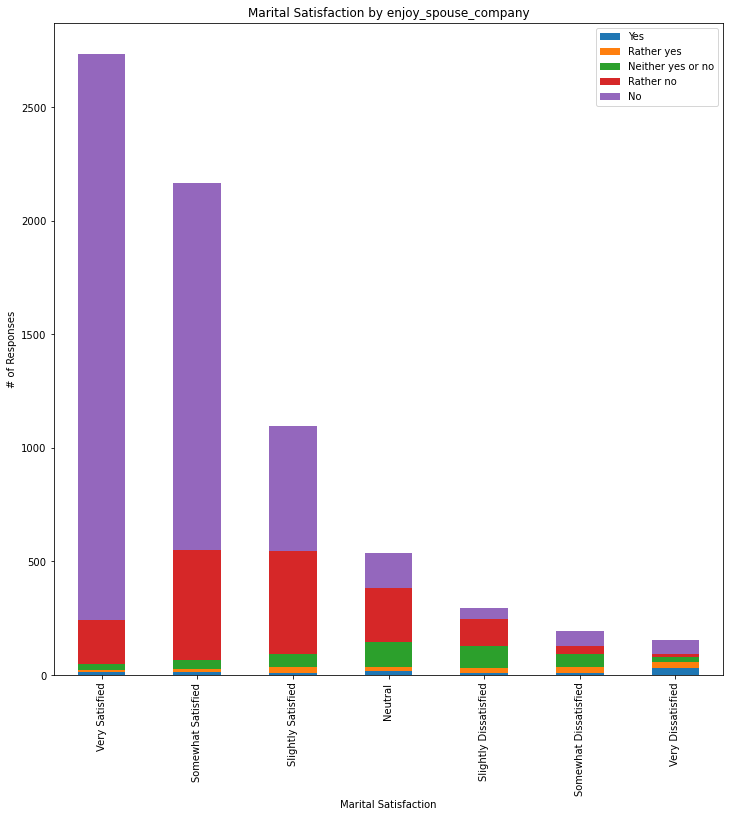

happiness              Neither yes or no    No  Rather no  Rather yes  Yes
marital_satisfaction                                                      
Neutral                              142   106        248          29   11
Slightly Dissatisfied                107    32        109          40    8
Slightly Satisfied                   108   347        604          27   10
Somewhat Dissatisfied                 51    55         42          36    9
Somewhat Satisfied                    80  1264        777          31   13
Very Dissatisfied                     19    66         26          23   22
Very Satisfied                        41  2302        376           8    9

Chi-square:
p: 0.0
chi2: 2896.971539784281
DoF: 24


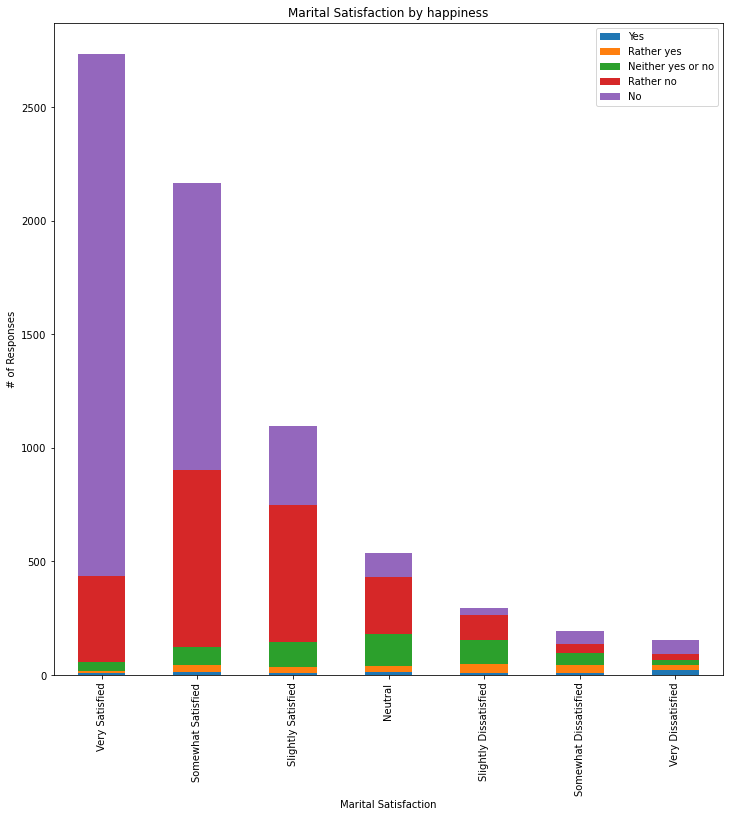

spouse_attraction      Neither yes or no    No  Rather no  Rather yes  Yes
marital_satisfaction                                                      
Neutral                              149   137        212          28   10
Slightly Dissatisfied                 86    49        114          38    9
Slightly Satisfied                   132   439        499          25    1
Somewhat Dissatisfied                 48    63         45          28    9
Somewhat Satisfied                    62  1385        699          16    3
Very Dissatisfied                     15    68         20          28   25
Very Satisfied                        35  2365        329           4    3

Chi-square:
p: 0.0
chi2: 2900.770180568829
DoF: 24


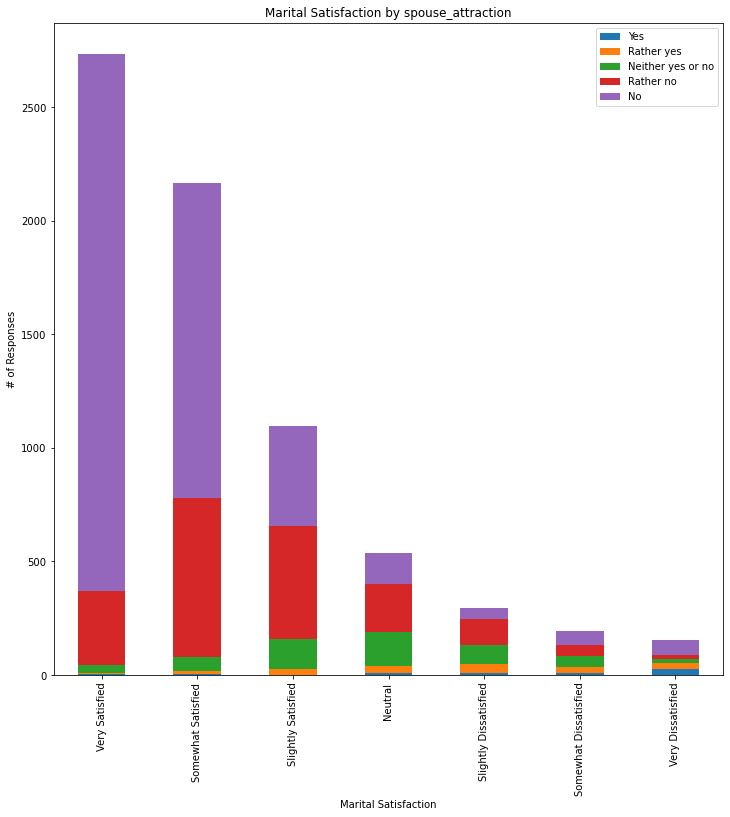

spouse_enjoy_doing_things_together  Neither yes or no    No  Rather no  \
marital_satisfaction                                                     
Neutral                                           113   159        202   
Slightly Dissatisfied                              70    54        116   
Slightly Satisfied                                104   483        467   
Somewhat Dissatisfied                              39    67         42   
Somewhat Satisfied                                 96  1394        637   
Very Dissatisfied                                  20    67         10   
Very Satisfied                                     47  2383        272   

spouse_enjoy_doing_things_together  Rather yes  Yes  
marital_satisfaction                                 
Neutral                                     51   11  
Slightly Dissatisfied                       45   11  
Slightly Satisfied                          30   12  
Somewhat Dissatisfied                       38    7  
Somewhat 

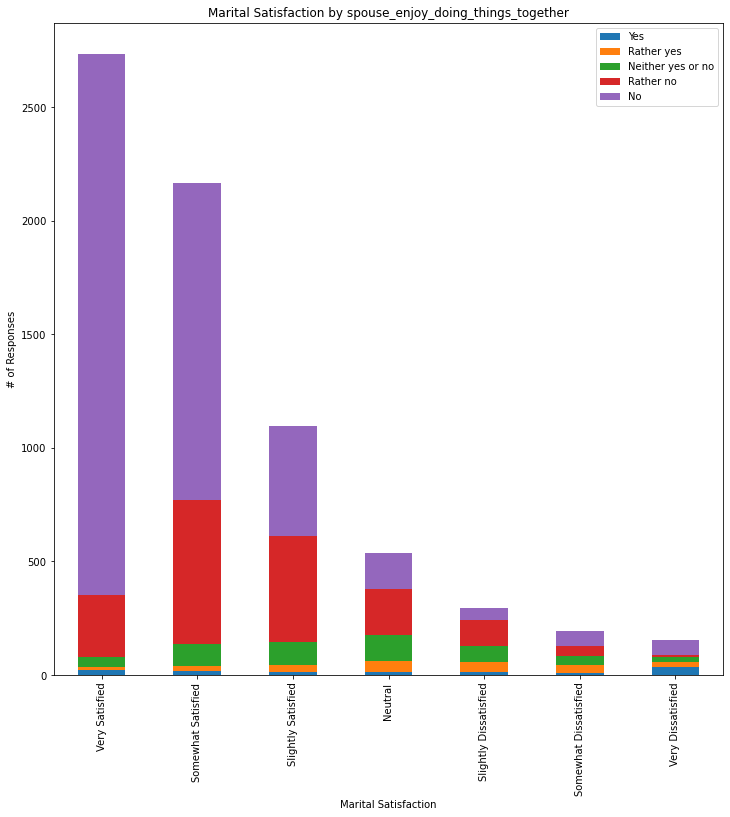

spouse_enjoy_cuddling  Neither yes or no    No  Rather no  Rather yes  Yes
marital_satisfaction                                                      
Neutral                              108   164        200          45   19
Slightly Dissatisfied                 91    58         96          37   14
Slightly Satisfied                   129   518        412          29    8
Somewhat Dissatisfied                 36    65         47          31   14
Somewhat Satisfied                    92  1472        581          15    5
Very Dissatisfied                     14    65         14          27   36
Very Satisfied                        65  2384        260          17   10

Chi-square:
p: 0.0
chi2: 2520.6079377927504
DoF: 24


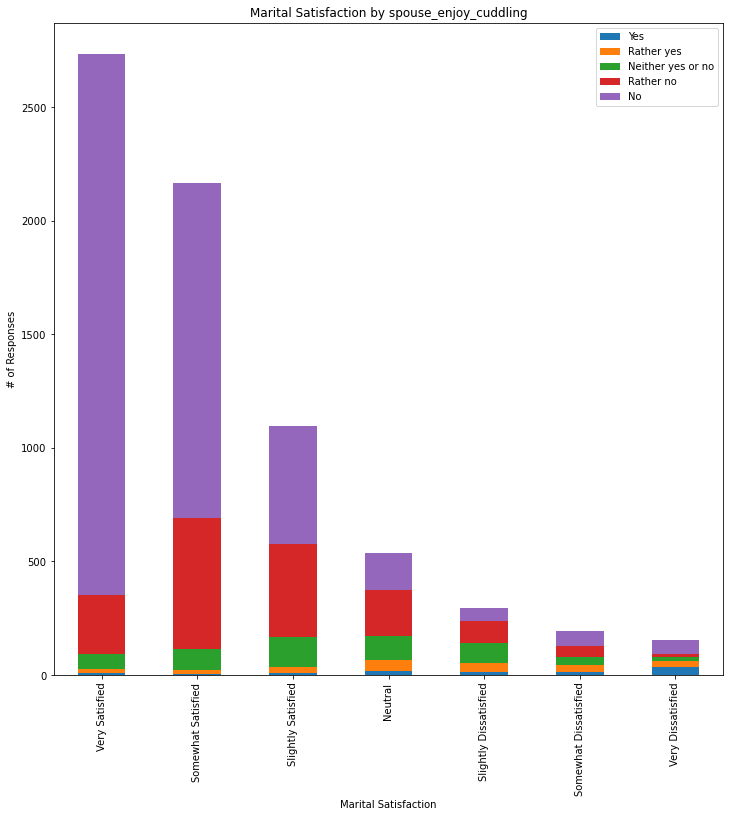

spouse_respect         Neither yes or no    No  Rather no  Rather yes  Yes
marital_satisfaction                                                      
Neutral                               60   258        205          11    2
Slightly Dissatisfied                 56    98        126          14    2
Slightly Satisfied                    30   696        363           5    2
Somewhat Dissatisfied                 24    82         66          18    3
Somewhat Satisfied                    12  1780        367           5    1
Very Dissatisfied                     17    76         28          19   16
Very Satisfied                         6  2562        164           2    2

Chi-square:
p: 0.0
chi2: 2321.059398804039
DoF: 24


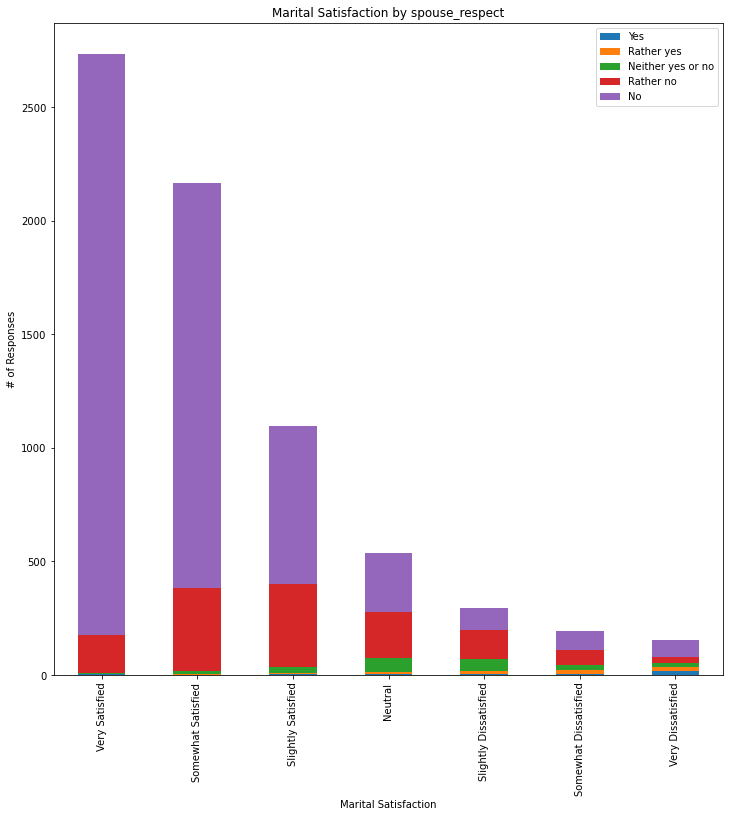

spouse_pride           Neither yes or no    No  Rather no  Rather yes  Yes
marital_satisfaction                                                      
Neutral                              116   151        238          26    5
Slightly Dissatisfied                 85    49        116          37    9
Slightly Satisfied                    85   536        460          10    5
Somewhat Dissatisfied                 38    69         44          32   10
Somewhat Satisfied                    72  1592        486          11    4
Very Dissatisfied                     18    67         12          18   41
Very Satisfied                        20  2528        186           2    0

Chi-square:
p: 0.0
chi2: 3576.224296425474
DoF: 24


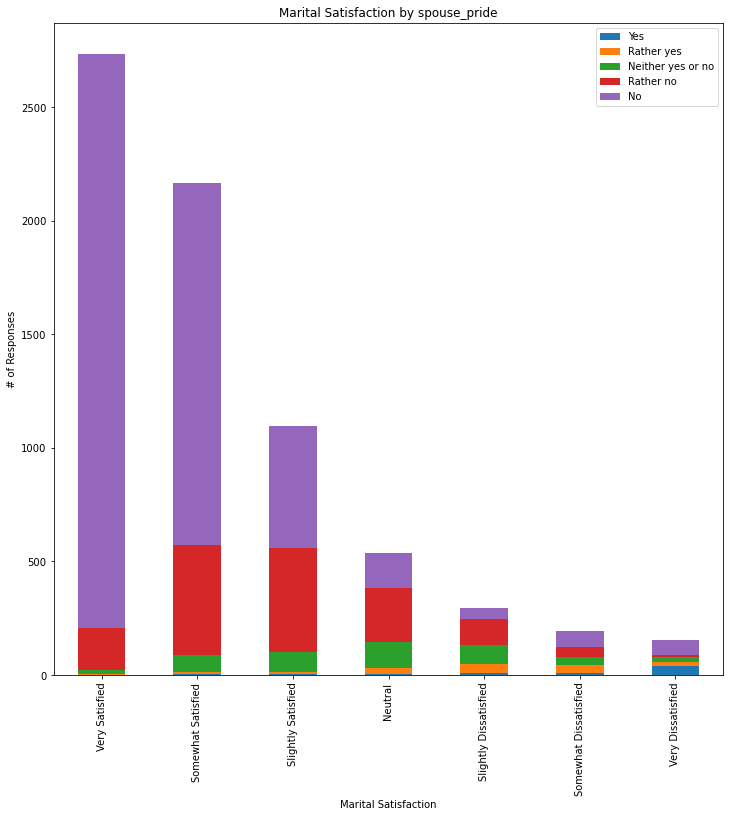

spouse_romance         Neither yes or no    No  Rather no  Rather yes  Yes
marital_satisfaction                                                      
Neutral                              191    73        137          98   37
Slightly Dissatisfied                 76    22         60          92   46
Slightly Satisfied                   248   216        485         110   37
Somewhat Dissatisfied                 34    33         45          44   37
Somewhat Satisfied                   226   868        956          93   22
Very Dissatisfied                     16    53         14          20   53
Very Satisfied                        99  1904        662          52   19

Chi-square:
p: 0.0
chi2: 2932.201405551542
DoF: 24


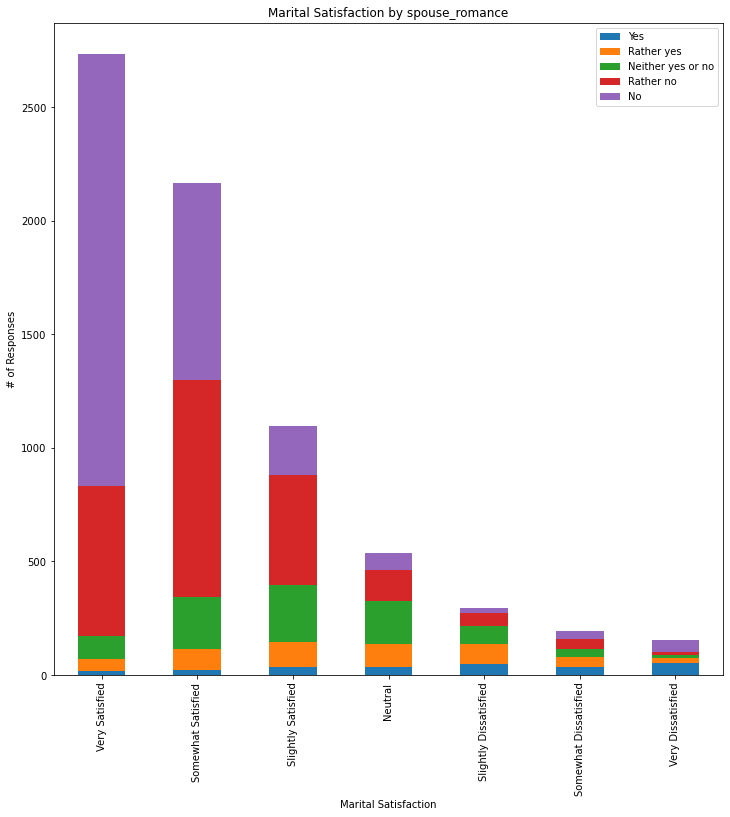

spouse_love            Neither yes or no    No  Rather no  Rather yes  Yes
marital_satisfaction                                                      
Neutral                               72   223        227          12    2
Slightly Dissatisfied                 73    66        126          24    7
Slightly Satisfied                    36   670        369          10   11
Somewhat Dissatisfied                 43    73         40          22   15
Somewhat Satisfied                    38  1819        289           8   11
Very Dissatisfied                     27    69         11          19   30
Very Satisfied                         7  2609         91           3   26

Chi-square:
p: 0.0
chi2: 2919.8538975654533
DoF: 24


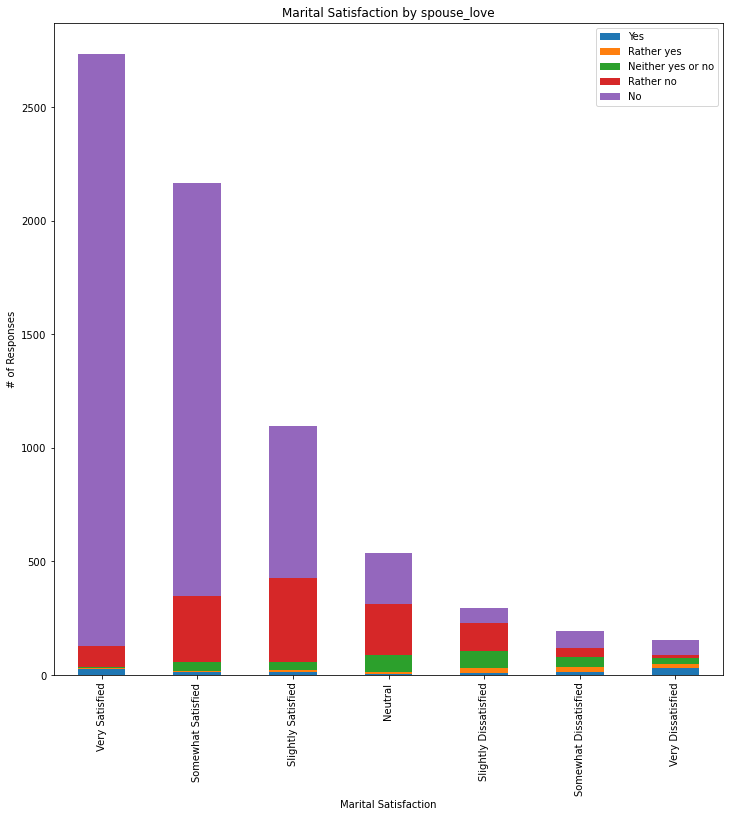

spouse_satisfaction    Neutral  Slightly Dissatisfied  Slightly Satisfied  \
marital_satisfaction                                                        
Neutral                    314                     66                 118   
Slightly Dissatisfied       50                    169                  16   
Slightly Satisfied         109                      5                 697   
Somewhat Dissatisfied        6                     26                   1   
Somewhat Satisfied          26                      4                 184   
Very Dissatisfied            1                      2                   2   
Very Satisfied               9                      1                  20   

spouse_satisfaction    Somewhat Dissatisfied  Somewhat Satisfied  \
marital_satisfaction                                               
Neutral                                   10                  17   
Slightly Dissatisfied                     40                  12   
Slightly Satisfied                

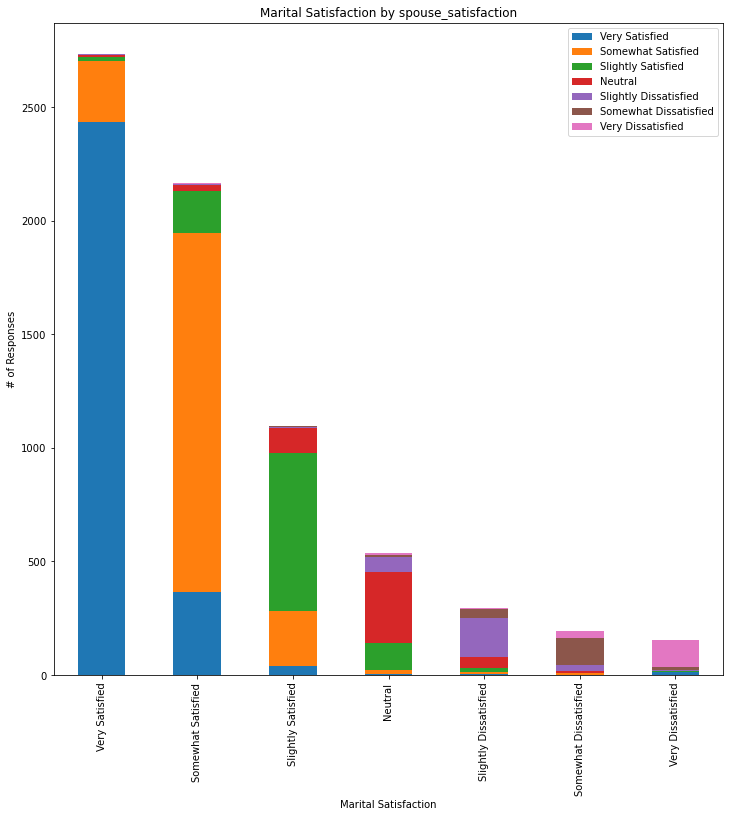

relationship_satisfaction  Neutral  Slightly Dissatisfied  Slightly Satisfied  \
marital_satisfaction                                                            
Neutral                        305                     76                 102   
Slightly Dissatisfied           40                    186                  19   
Slightly Satisfied             117                     14                 698   
Somewhat Dissatisfied            9                     21                   1   
Somewhat Satisfied              25                      7                 244   
Very Dissatisfied                0                      4                   4   
Very Satisfied                   7                      6                  31   

relationship_satisfaction  Somewhat Dissatisfied  Somewhat Satisfied  \
marital_satisfaction                                                   
Neutral                                       11                  26   
Slightly Dissatisfied                         36      

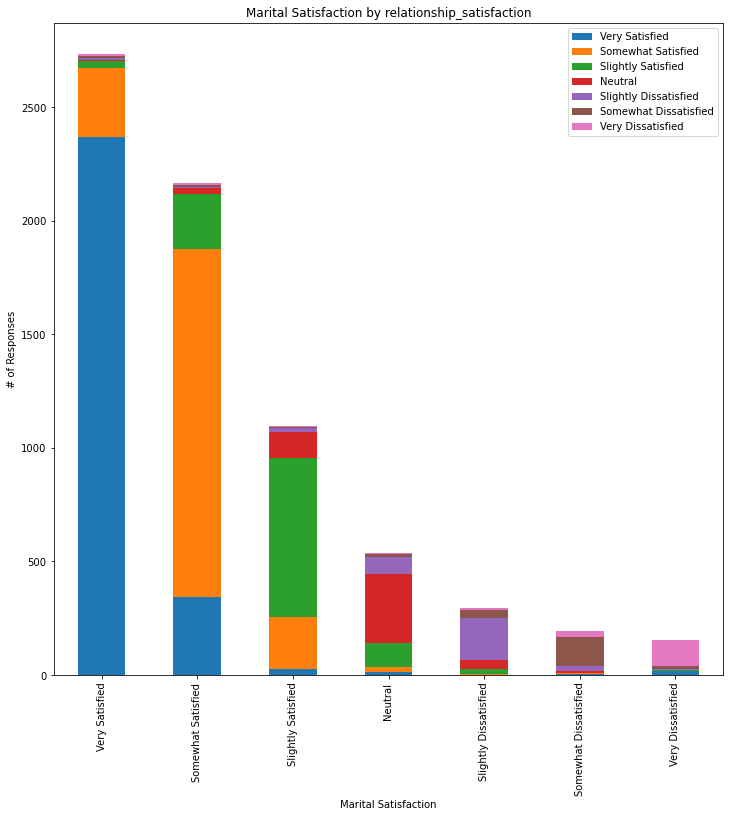

natl_pride_in_parents  Agree slightly  Agree somewhat  Disagree slightly  \
marital_satisfaction                                                       
Neutral                           129             153                 35   
Slightly Dissatisfied              84              82                 15   
Slightly Satisfied                251             377                 75   
Somewhat Dissatisfied              39              72                 12   
Somewhat Satisfied                406             844                124   
Very Dissatisfied                  28              35                  8   
Very Satisfied                    475             865                101   

natl_pride_in_parents  Disagree somewhat  Disagree strongly  \
marital_satisfaction                                          
Neutral                               35                  5   
Slightly Dissatisfied                 11                  5   
Slightly Satisfied                    56                 19   


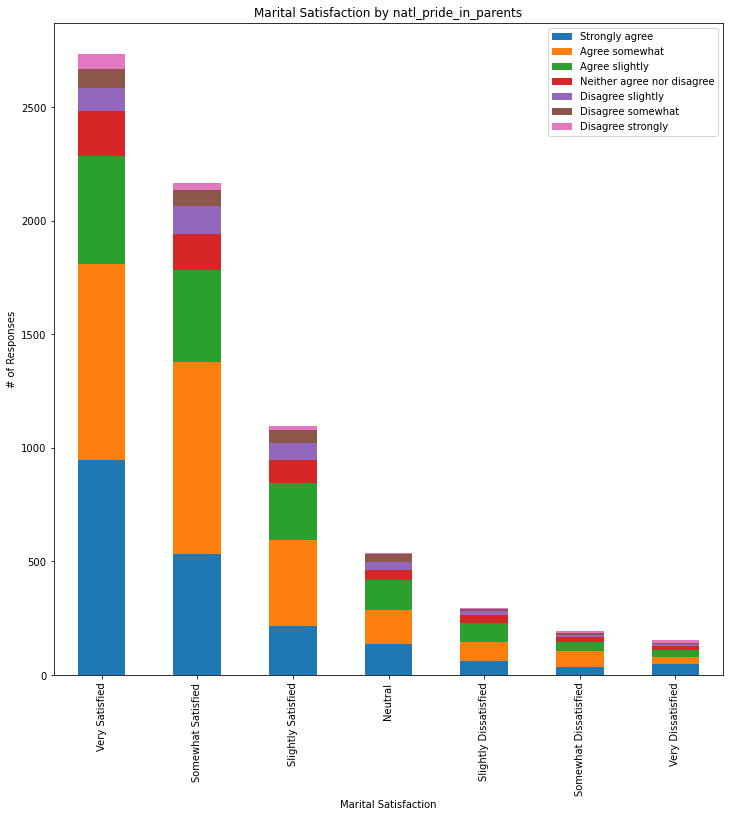

natl_pride_in_children  Agree slightly  Agree somewhat  Disagree slightly  \
marital_satisfaction                                                        
Neutral                             63             158                 21   
Slightly Dissatisfied               32             105                  9   
Slightly Satisfied                 145             313                 26   
Somewhat Dissatisfied               31              62                  7   
Somewhat Satisfied                 210             641                 63   
Very Dissatisfied                   14              39                  7   
Very Satisfied                     234             706                 56   

natl_pride_in_children  Disagree somewhat  Disagree strongly  \
marital_satisfaction                                           
Neutral                                15                 13   
Slightly Dissatisfied                  11                  4   
Slightly Satisfied                     43         

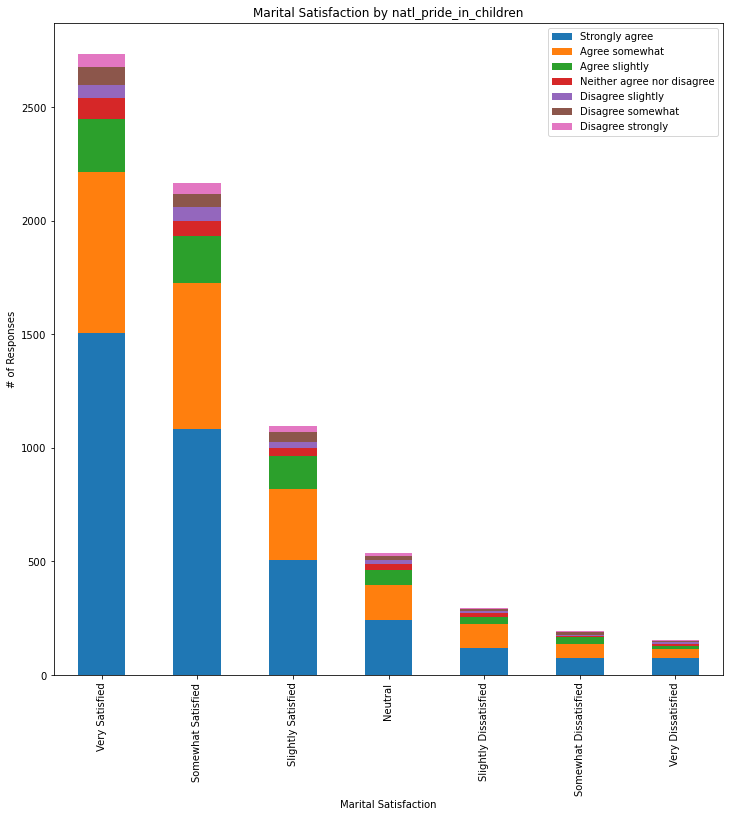

natl_aging_parents_live_with_children  Agree slightly  Agree somewhat  \
marital_satisfaction                                                    
Neutral                                           102             113   
Slightly Dissatisfied                              59              58   
Slightly Satisfied                                261             199   
Somewhat Dissatisfied                              36              39   
Somewhat Satisfied                                505             448   
Very Dissatisfied                                  28              29   
Very Satisfied                                    570             610   

natl_aging_parents_live_with_children  Disagree slightly  Disagree somewhat  \
marital_satisfaction                                                          
Neutral                                               84                 71   
Slightly Dissatisfied                                 34                 55   
Slightly Satisfied        

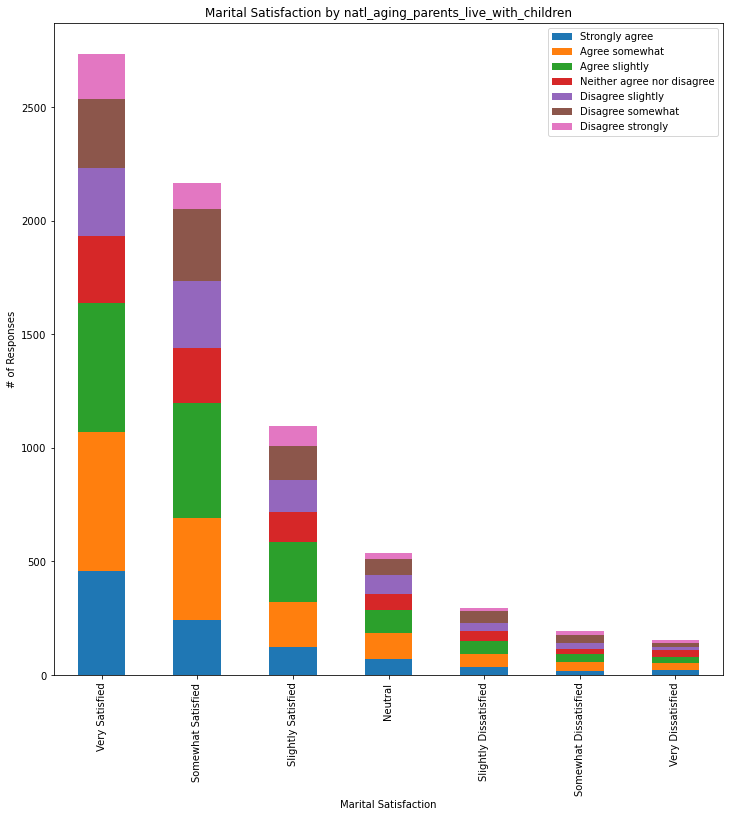

natl_children_live_at_home_marraige  Agree slightly  Agree somewhat  \
marital_satisfaction                                                  
Neutral                                          72             160   
Slightly Dissatisfied                            57              92   
Slightly Satisfied                              167             343   
Somewhat Dissatisfied                            34              49   
Somewhat Satisfied                              324             707   
Very Dissatisfied                                28              39   
Very Satisfied                                  370             789   

natl_children_live_at_home_marraige  Disagree slightly  Disagree somewhat  \
marital_satisfaction                                                        
Neutral                                             42                 35   
Slightly Dissatisfied                               23                 19   
Slightly Satisfied                                  

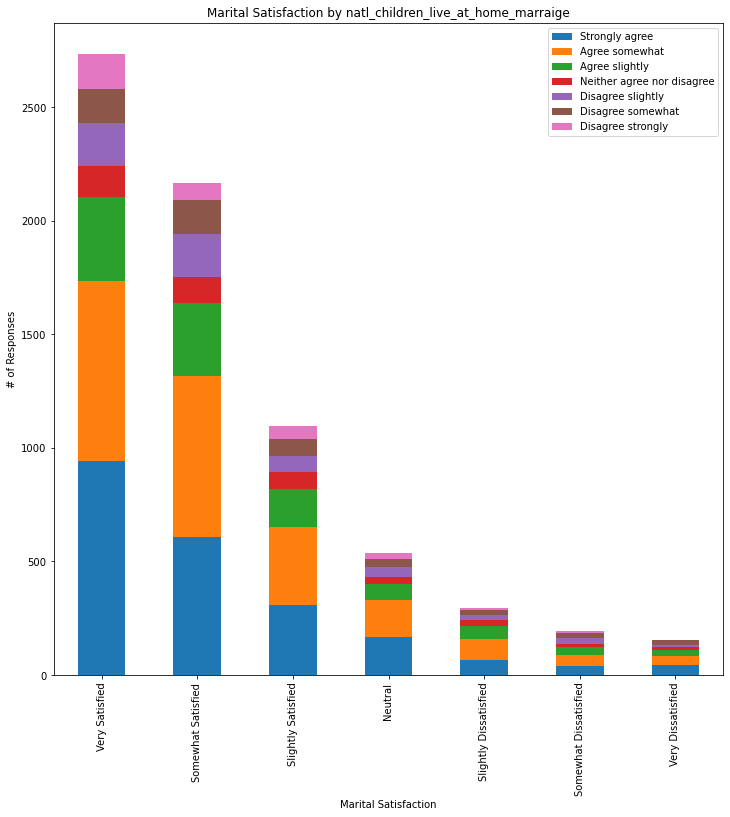

indv_pride_in_parents  Agree slightly  Agree somewhat  Disagree slightly  \
marital_satisfaction                                                       
Neutral                            80             160                 21   
Slightly Dissatisfied              55              72                 14   
Slightly Satisfied                155             359                 45   
Somewhat Dissatisfied              31              64                 10   
Somewhat Satisfied                247             649                 82   
Very Dissatisfied                  23              43                  4   
Very Satisfied                    270             699                 92   

indv_pride_in_parents  Disagree somewhat  Disagree strongly  \
marital_satisfaction                                          
Neutral                               10                 20   
Slightly Dissatisfied                  3                  6   
Slightly Satisfied                    37                 31   


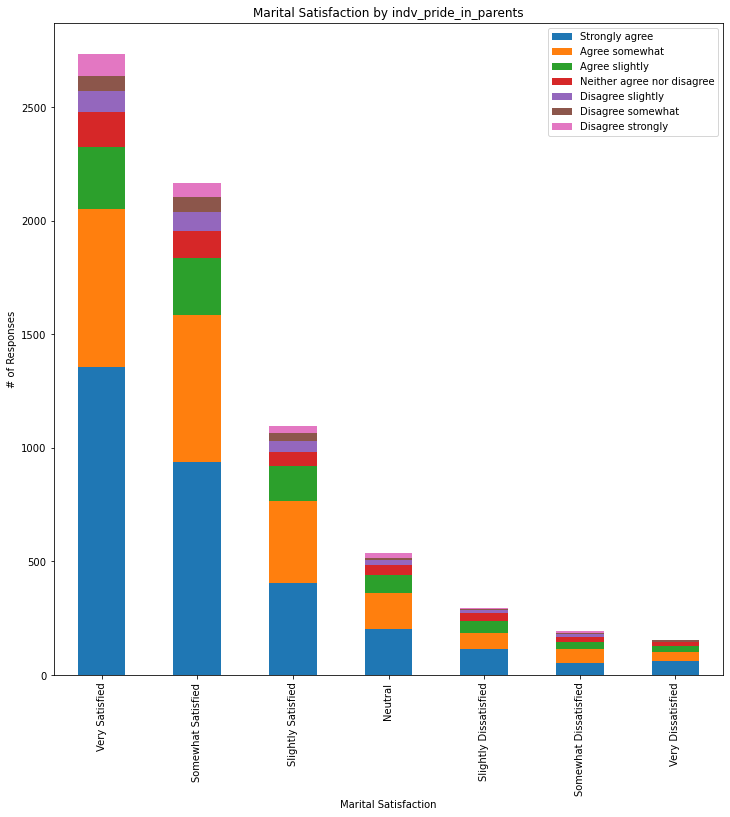

indv_pride_in_children  Agree slightly  Agree somewhat  Disagree slightly  \
marital_satisfaction                                                        
Neutral                             50             141                 20   
Slightly Dissatisfied               28              86                  8   
Slightly Satisfied                 115             256                 31   
Somewhat Dissatisfied               24              53                  6   
Somewhat Satisfied                 168             513                 36   
Very Dissatisfied                   17              41                  2   
Very Satisfied                     185             567                 43   

indv_pride_in_children  Disagree somewhat  Disagree strongly  \
marital_satisfaction                                           
Neutral                                 3                 28   
Slightly Dissatisfied                   8                  8   
Slightly Satisfied                     38         

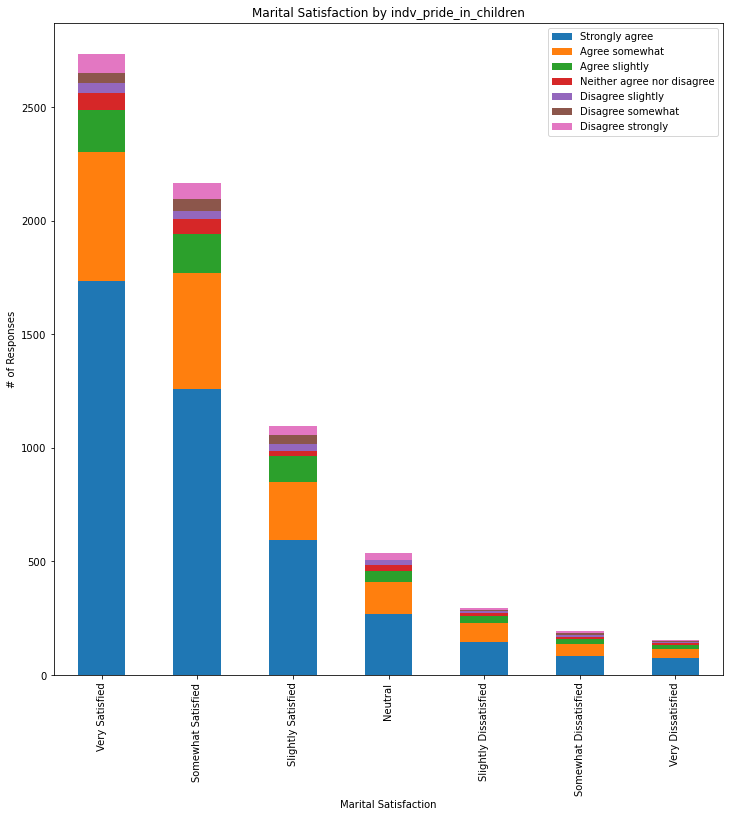

indv_aging_parents_live_with_children  Agree slightly  Agree somewhat  \
marital_satisfaction                                                    
Neutral                                            90             109   
Slightly Dissatisfied                              44              57   
Slightly Satisfied                                185             198   
Somewhat Dissatisfied                              32              31   
Somewhat Satisfied                                347             423   
Very Dissatisfied                                  28              28   
Very Satisfied                                    448             512   

indv_aging_parents_live_with_children  Disagree slightly  Disagree somewhat  \
marital_satisfaction                                                          
Neutral                                               49                 66   
Slightly Dissatisfied                                 37                 39   
Slightly Satisfied        

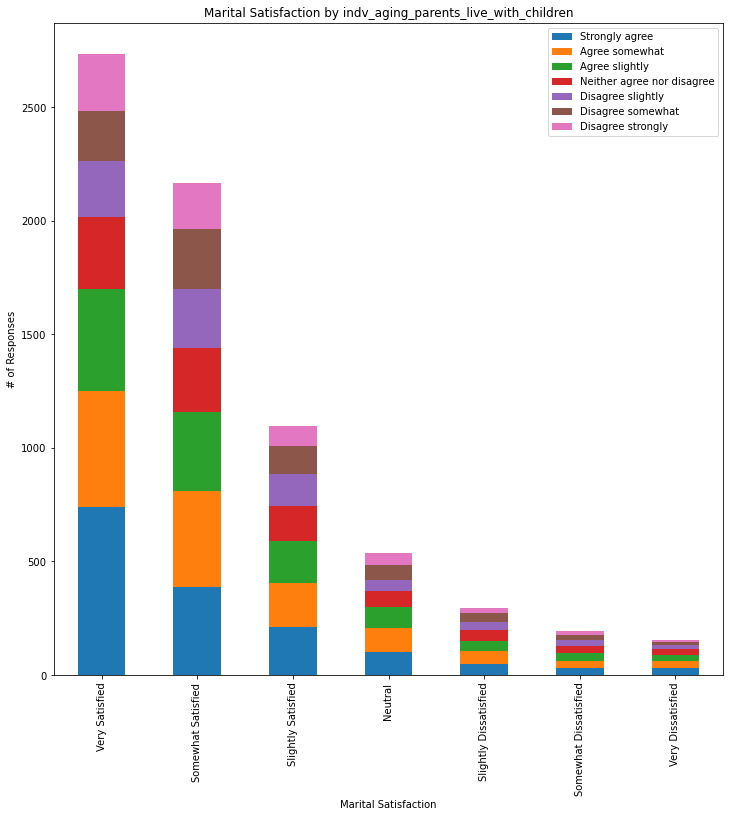

indv_children_live_at_home_marraige  Agree slightly  Agree somewhat  \
marital_satisfaction                                                  
Neutral                                          98             111   
Slightly Dissatisfied                            49              70   
Slightly Satisfied                              173             252   
Somewhat Dissatisfied                            23              42   
Somewhat Satisfied                              378             512   
Very Dissatisfied                                28              29   
Very Satisfied                                  363             600   

indv_children_live_at_home_marraige  Disagree slightly  Disagree somewhat  \
marital_satisfaction                                                        
Neutral                                             44                 46   
Slightly Dissatisfied                               28                 38   
Slightly Satisfied                                  

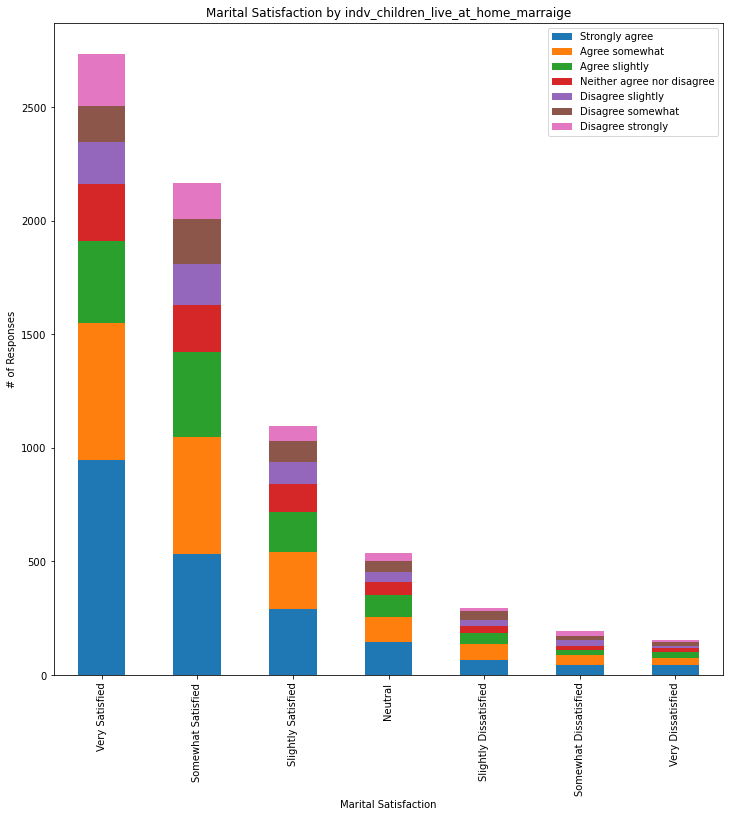

In [30]:
# Freq charts of all survey questions vs target variable

for i in ivs:
  
    if len(data_wrangled[i].unique()) == 5:
        df = data_wrangled[['marital_satisfaction',i]]
        ct = pd.crosstab(index=df['marital_satisfaction'], columns=df[i])
        print(ct)
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        print("")
        print("Chi-square:")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        df = pd.DataFrame(df.groupby(['marital_satisfaction', i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df[i] = df[i].astype(mrq_order)
        df = df.pivot_table(df, index='marital_satisfaction', columns=i)
        df.loc[marsat_responses].plot(kind='bar', stacked=True, figsize=(12,12))
        plt.xlabel('Marital Satisfaction')
        plt.ylabel('# of Responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(mrq_responses)
        plt.show()
        
        
    elif len(data_wrangled[i].unique()) == 7 and np.sort(data_wrangled['marital_satisfaction'].unique()).all() == np.sort(data_wrangled[i].unique()).all():
        df = data_wrangled[['marital_satisfaction',i]]
        ct = pd.crosstab(index=df['marital_satisfaction'], columns=df[i])
        print(ct)
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        print("")
        print("Chi-square:")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        df = pd.DataFrame(df.groupby(['marital_satisfaction', i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df[i] = df[i].astype(marsat_order)
        df = df.pivot_table(df, index='marital_satisfaction', columns=i)
        df.loc[marsat_responses].plot(kind='bar', stacked=True, figsize=(12,12))
        plt.xlabel('Marital Satisfaction')
        plt.ylabel('# of Responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(marsat_responses)
        plt.show()

    elif len(data_wrangled[i].unique()) == 7 and np.sort(data_wrangled['marital_satisfaction'].unique()).all() != np.sort(data_wrangled[i].unique()).all():
        df = data_wrangled[['marital_satisfaction',i]]
        ct = pd.crosstab(index=df['marital_satisfaction'], columns=df[i])
        print(ct)
        stat, p, dof, expected = scipy.stats.chi2_contingency(ct)
        print("")
        print("Chi-square:")
        print("p: " + str(p))
        print("chi2: " + str(stat))
        print("DoF: " + str(dof))
        df = pd.DataFrame(df.groupby(['marital_satisfaction', i]).size()).reset_index()
        df.rename(columns = {0:'count'}, inplace=True)
        df[i] = df[i].astype(gs_order)
        df = df.pivot_table(df, index='marital_satisfaction', columns=i)
        df.loc[marsat_responses].plot(kind='bar', stacked=True, figsize=(12,12))
        plt.xlabel('Marital Satisfaction')
        plt.ylabel('# of Responses')
        plt.title('Marital Satisfaction by ' + i)
        plt.legend(gs_responses)
        plt.show()

In [31]:
df = data_wrangled[['marital_satisfaction','spouse_pride']]
df = pd.DataFrame(df.groupby(['marital_satisfaction', 'spouse_pride']).size()).reset_index()
df.rename(columns = {0:'count'}, inplace=True)
print(df)


     marital_satisfaction       spouse_pride  count
0                 Neutral  Neither yes or no    116
1                 Neutral                 No    151
2                 Neutral          Rather no    238
3                 Neutral         Rather yes     26
4                 Neutral                Yes      5
5   Slightly Dissatisfied  Neither yes or no     85
6   Slightly Dissatisfied                 No     49
7   Slightly Dissatisfied          Rather no    116
8   Slightly Dissatisfied         Rather yes     37
9   Slightly Dissatisfied                Yes      9
10     Slightly Satisfied  Neither yes or no     85
11     Slightly Satisfied                 No    536
12     Slightly Satisfied          Rather no    460
13     Slightly Satisfied         Rather yes     10
14     Slightly Satisfied                Yes      5
15  Somewhat Dissatisfied  Neither yes or no     38
16  Somewhat Dissatisfied                 No     69
17  Somewhat Dissatisfied          Rather no     44
18  Somewhat